In [1]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
from scipy.ndimage import gaussian_filter
import scipy
from scipy.io import loadmat
import json
from matplotlib import cm as CM
%matplotlib inline

## Function to general labels, given the annotations

In [21]:
def generate_label(label_info, image_shape, dataset):
    """
    Generate a density map based on objects positions.
    Args:
        label_info: list of (x, y, ...) objects positions
        image_shape: (width, height) of a density map to be generated
        dataset: one of {SHT, JHU}
    Returns:
        A density map.
    """    
    # create an empty density map
    density = np.zeros(image_shape, dtype=np.float32)

    if dataset == 'SHT':
        for x, y, *_ in label_info:
            if int(y) < image_shape[0] and int(x) < image_shape[1]:
                density[int(y)][int(x)] = 1
    elif dataset == 'JHU':
        for string in label_info:
            line = string.split()
            x, y = line[0], line[1]
            if int(y) < image_shape[0] and int(x) < image_shape[1]:
                density[int(y)][int(x)] = 1
        
    # apply a convolution with a Gaussian kernel
    density = gaussian_filter(density, sigma=(1, 1), order=0) # sigma can be changed?

    return density

## Generating consolidated HDF5 files for:

#### SHT Part A

In [1]:
#set the root to the Shanghai dataset you download
root = '../data/SHT/'

part_A_train = os.path.join(root,'part_A_final/train_data','images')
part_A_test = os.path.join(root,'part_A_final/test_data','images')
path_sets = [part_A_train,part_A_test]

img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

print('Generating HDF5 files...'.format(len(img_paths)))
for id, img_path in enumerate(img_paths):
    #print('Currently at file: {}'.format(img_path))
    gt = io.loadmat(img_path.replace('.jpg','.mat')
                     .replace('images','ground_truth')
                     .replace('IMG_','GT_IMG_'))
    gt = gt['image_info'][0][0][0][0][0]
    
    img = plt.imread(img_path) / 255
    label = generate_label(gt, img.shape[:2], 'SHT')
    
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','consolidated'), 'w') as hdf:
        hdf['image'] = img
        hdf['density'] = label
        
print('Done: Generated HDF5 files for {} instance(s)'.format(id+1))
print()

NameError: name 'os' is not defined

#### SHT Part B

In [23]:
#set the root to the Shanghai dataset you download
root = '../data/SHT/'

part_B_train = os.path.join(root,'part_B_final/train_data','images')
part_B_test = os.path.join(root,'part_B_final/test_data','images')
path_sets = [part_B_train,part_B_test]

img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

print('Generating HDF5 files...'.format(len(img_paths)))
for id, img_path in enumerate(img_paths):
    #print('Currently at file: {}'.format(img_path))
    gt = io.loadmat(img_path.replace('.jpg','.mat')
                     .replace('images','ground_truth')
                     .replace('IMG_','GT_IMG_'))
    gt = gt['image_info'][0][0][0][0][0]
    
    img = plt.imread(img_path) / 255
    label = generate_label(gt, img.shape[:2], 'SHT')
    
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','consolidated'), 'w') as hdf:
        hdf['image'] = img
        hdf['density'] = label
        
print('Done: Generated HDF5 files for {} instance(s)'.format(id+1))
print()

Generating HDF5 files...
Done: Generated HDF5 files for 8 instance(s)



#### JHU

In [24]:
#set the root to the Shanghai dataset you download
root = '../data/JHU/'

JHU_train = os.path.join(root, 'train', 'images')
JHU_test = os.path.join(root, 'test', 'images')
JHU_val = os.path.join(root, 'val', 'images')

path_sets = [JHU_train, JHU_test, JHU_val]

img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

print('Generating HDF5 files...'.format(len(img_paths)))
for id, img_path in enumerate(img_paths):
    #print('Currently at file: {}'.format(img_path))
    gt = open(img_path.replace('.jpg', '.txt')
              .replace('images', 'gt'), 'r').readlines()
    
    img = plt.imread(img_path) / 255
    label = generate_label(gt, img.shape[:2], 'JHU')
    
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','consolidated'), 'w') as hdf:
        hdf['image'] = img
        hdf['density'] = label
        
print('Done: Generated HDF5 files for {} instance(s)'.format(id+1))
print()

Generating HDF5 files...
Done: Generated HDF5 files for 9 instance(s)



<h2 style="color:red; text-align:center;">Don't need to run below Don't need to run below Don't need to run below</h2>

In [2]:
filename = "../data/SHT/part_A_final/train_data/consolidated/IMG_1.h5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f[a_group_key])

Keys: <KeysViewHDF5 ['density', 'image']>


In [30]:
def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))

list_files('../data/SHT/part_A_final')

part_A_final/
    test_data/
        consolidated/
            IMG_1.h5
            IMG_2.h5
            IMG_3.h5
        ground_truth/
            GT_IMG_1.mat
            GT_IMG_2.mat
            GT_IMG_3.mat
        images/
            IMG_1.jpg
            IMG_2.jpg
            IMG_3.jpg
    train_data/
        consolidated/
            IMG_1.h5
            IMG_196.h5
            IMG_2.h5
            IMG_3.h5
        ground_truth/
            GT_IMG_1.mat
            GT_IMG_196.mat
            GT_IMG_2.mat
            GT_IMG_3.mat
        images/
            IMG_1.jpg
            IMG_196.jpg
            IMG_2.jpg
            IMG_3.jpg


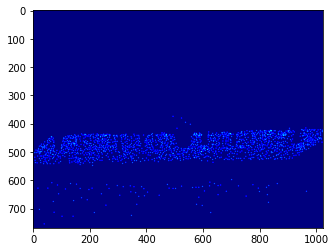

In [13]:
gt_file = h5py.File(filename,'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)


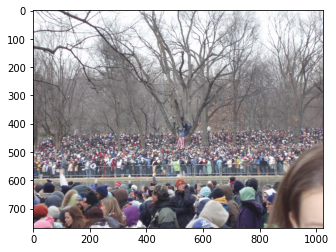

In [8]:
image_path = "../data/SHT/part_A_final/train_data/images/IMG_1.jpg"
plt.imshow(Image.open(image_path))

In [11]:
print(f'There are {int(np.sum(groundtruth))} people in this image')

There are 1545 people in this image
